# Ejemplo con datos 5.benign limpios y 8 datasets de ataques.

In [1]:
#Vamos a crear el modelo.
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from IPython.display import Image, display
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, RobustScaler, QuantileTransformer, Normalizer
from sklearn.metrics import accuracy_score, precision_recall_curve, classification_report, confusion_matrix, average_precision_score, roc_curve, auc
%matplotlib inline

In [3]:
def cargar_datos():
    #x = pd.read_csv('/home/edinson/Documentos/U-distrital/Preprocesing/Repositorio/x5.csv')
    x = pd.read_csv('/home/edinson/Documentos/U-distrital/Preprocesing/Repositorio/nbaiot-dataset/5.benign.csv')
    columnas = x.columns
    df1 = pd.DataFrame(columns = columnas)
    df2 = pd.DataFrame(columns = columnas)
    
    
    #normal1 = pd.read_csv('/home/edinson/Documentos/U-distrital/Preprocesing/Repositorio/x5.csv')
    normal1 = pd.read_csv('/home/edinson/Documentos/U-distrital/Preprocesing/Repositorio/nbaiot-dataset/5.benign.csv')
    df1 = df1.append(normal1, ignore_index=True, sort=False)
    
    n_X = df1.iloc[:,]
    n_X_scaled = MinMaxScaler().fit_transform(n_X.values)
    n_y = np.ones(n_X.shape[0]) # 1 represents normal

    
    devices_a = ['2.gafgyt.combo.csv', '2.gafgyt.junk.csv', '2.gafgyt.scan.csv', '2.gafgyt.tcp.csv', '2.gafgyt.udp.csv', '2.mirai.ack.csv', '2.mirai.scan.csv', '2.mirai.syn.csv']
    for device_id, device_name in enumerate(devices_a, 1):
        anomalo1 = pd.read_csv('/home/edinson/Documentos/U-distrital/Preprocesing/Repositorio/nbaiot-dataset/{}'.format(device_name))
        df2 = df2.append(anomalo1, ignore_index=True, sort=False)
    
    a_X = df2.iloc[:,]
    a_X_scaled = MinMaxScaler().fit_transform(a_X.values)
    a_y = np.zeros(a_X.shape[0]) # 0 represents anomalous
    
    return (n_X_scaled, n_y, a_X_scaled, a_y)




In [4]:
def agrupar_datos(n_X_scaled, n_y, a_X_scaled, a_y):
    X = np.append(n_X_scaled, a_X_scaled, axis = 0)
    #y_n = np.ones(n_X_scaled.shape[0])
    #y_a = np.zeros(a_X_scaled.shape[0])
    #y = np.append(y_n, y_a)
    y = np.append(n_y, a_y)
    
    X = pd.DataFrame(X)#Ahora convertimos el array 'values' a un dataframe, usamos 'x' por que es la variable
                   #con la que vamos a crear el modelo.
    X.columns = X.columns #Le ponemos las columnas de movies_v2
    
    y = pd.DataFrame(y)
    y = y.rename(columns={0:'clases'})
    return (X, y)

In [14]:
def crear_modelo_predeccion(X, y):
    # Paso 3: importamos la clase LogisticRegresion de scikit-learn
    from sklearn.linear_model import LogisticRegression
    from sklearn.model_selection import train_test_split
    
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=7) #40% para prueba y 60% para entrenamiento
    
    # Paso 4: Creamos una instancia de la Regresión Logística
    regresion_logistica = LogisticRegression()
    
    # Paso 5: Entrena la regresión logística con los datos de entrenamiento
    regresion_logistica.fit(x_train, y_train)
    
    # Paso 6: Usa el modelo entrenado para obtener las predicciones con datos nuevos
    prediccion = regresion_logistica.predict(x_test)
    prediccion = pd.DataFrame(prediccion)
    prediccion = prediccion.rename(columns={0:'resultado'})
    #print(prediccion)
    return (prediccion, y_test)


In [15]:
def imprimir_resultados(prediccion, y_test):
    prediccion = prediccion.rename(columns={0:'resultado'})
    
    print ("")
    print("CANTIDAD REGISTROS POR CLASE DEL TOTAL DE LOS DATOS")
    print(y.groupby('clases').size())
    
    print ("")
    print("CANTIDAD DE REGISTROS PREDICHOS POR EL MODELO, TAMAÑO IGUAL A y_test")
    print(prediccion.groupby('resultado').size())
    
    print ("")
    print("CANTIDAD CLASES POR REGISTROS  EN LA PRUEBA")
    print(y_test.groupby('clases').size())
    
    
    print ("")
    print("MATRIX DE CONFUSIÓN, PREDICCIONES CON LOS VALORES ESPERADOS ")
    print(confusion_matrix(y_test, prediccion))
    
    print ("")
    print("REPORTE DE CLASIFICACIÓN")
    print(classification_report(y_test, prediccion))
    
    print ("Accuracy Score: ", accuracy_score(y_test, prediccion))
    
    print ("")
    print("COMPARACIÓN DE LAS PREDICCIONES CON LOS VALORES ESPERADOS.")
    plt.hist([prediccion["resultado"], y_test["clases"]]);
    

/home/edinson/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)



CANTIDAD REGISTROS POR CLASE DEL TOTAL DE LOS DATOS
clases
0.0    583914
1.0     62154
dtype: int64

CANTIDAD DE REGISTROS PREDICHOS POR EL MODELO, TAMAÑO IGUAL A y_test
resultado
0.0    233509
1.0     24919
dtype: int64

CANTIDAD CLASES POR REGISTROS  EN LA PRUEBA
clases
0.0    233510
1.0     24918
dtype: int64

MATRIX DE CONFUSIÓN, PREDICCIONES CON LOS VALORES ESPERADOS 
[[233509      1]
 [     0  24918]]

REPORTE DE CLASIFICACIÓN
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    233510
         1.0       1.00      1.00      1.00     24918

    accuracy                           1.00    258428
   macro avg       1.00      1.00      1.00    258428
weighted avg       1.00      1.00      1.00    258428

Accuracy Score:  0.9999961304502608

COMPARACIÓN DE LAS PREDICCIONES CON LOS VALORES ESPERADOS.


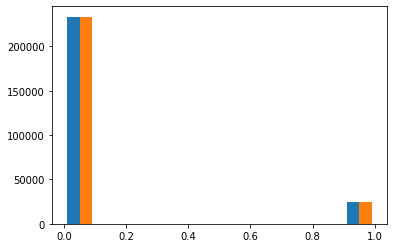

In [16]:
(n_X_scaled, n_y, a_X_scaled, a_y) = cargar_datos()
(X, y) = agrupar_datos(n_X_scaled, n_y, a_X_scaled, a_y)
(prediccion, y_test) = crear_modelo_predeccion(X, y)
imprimir_resultados(prediccion, y_test)
